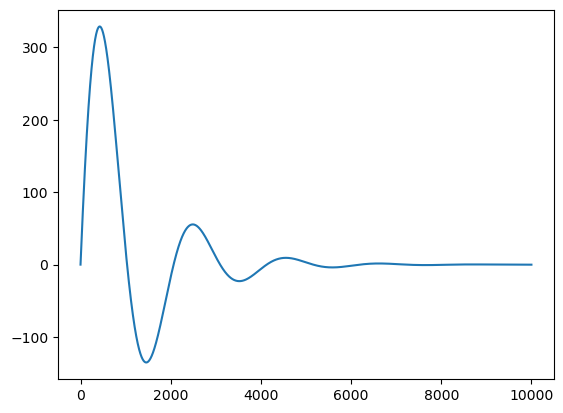

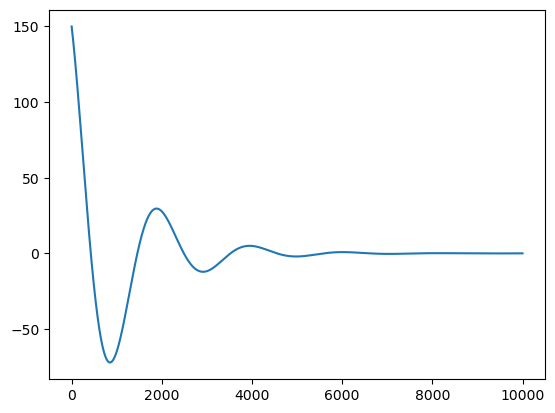

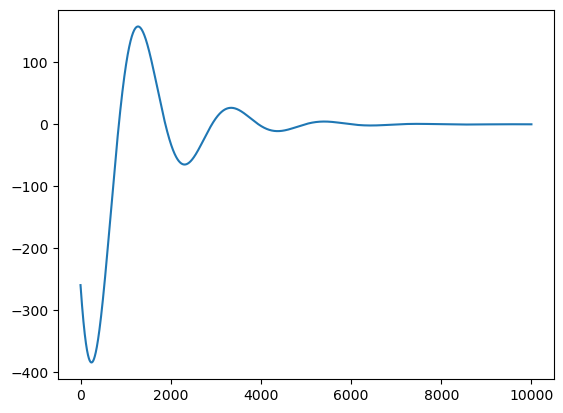

In [43]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from math import sqrt

class Dyn_block_1D:
    def __init__(self, x0, v0, m, dt):
        self.x  = np.array([[x0],[v0]])
        self.m  = m
        # self.k = k
        self.dt = dt
        self.A  = np.array([[0, 1],
                            [0, 0]])
        self.B  = np.array([[0], [1.0/self.m]])

    # вычисление динамики системы по заданному управлению
    # f(x,u) = A*x + B*u
    def sys_dyn(self, u):
        xdot = self.A @ self.x + self.B @ u
        return xdot

    # x_(k+1) = x_k + x_dot_k * dt
    def integrate(self, xdot):
        self.x += xdot * self.dt

    def get_state(self):
        return self.x

block = Dyn_block_1D(0.0, 150.0, 10.0, 0.01)

num_episodes = 10000

x_coord = []
x_veloc = []
u_traj  = []

for i in range(num_episodes):
    x = block.get_state()

    # u = u(x)
    # control = 0
    # control = 10 * np.sin(i / 50.0)
    # control = (-1)*block.k*x[0,0]
    control = (-1) * x[0,0] - sqrt(3.0) * x[1,0] # управление, стабилизирующее систему

    x_coord.append(x[0, 0])
    x_veloc.append(x[1, 0])
    u_traj.append(control)
    
    x_dot = block.sys_dyn(np.array([[control]]))
    
    block.integrate(x_dot)

plt.plot(x_coord)
plt.show()
plt.plot(x_veloc)
plt.show()
plt.plot(u_traj)
plt.show()
    
    

# 